# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this IPython notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Write your Algorithm
* [Step 7](#step7): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

### Import Dog Dataset

In the code cell below, we import a dataset of dog images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `dog_names` - list of string-valued dog breed names for translating labels

In [2]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('dogImages/train')
valid_files, valid_targets = load_dataset('dogImages/valid')
test_files, test_targets = load_dataset('dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

Using TensorFlow backend.


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


### Import Human Dataset

In the code cell below, we import a dataset of human images, where the file paths are stored in the numpy array `human_files`.

In [3]:
import random
random.seed(8675309)

# load filenames in shuffled human dataset
human_files = np.array(glob("lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


---
<a id='step1'></a>
## Step 1: Detect Humans

We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.

In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


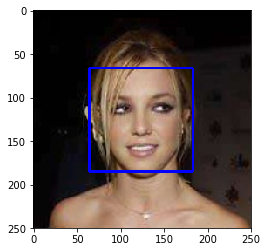

In [4]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
tran

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [5]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ In the code below, using the Haar Cascade 'face_detector()' function, 99% of the first 100 human faces were detected properly. In a separate run with the full 'human_files' set, 98.75% of the 13,233 human faces were detected correctly. For the first 100 dog images, 11% were incorrectly detected as human faces. 10.9% of the full set of 6,680 dog training images detected human faces. Note that it is unknown how many of these are incorrect. As shown later, many of the dog images from the training set also include a human face in the image, which is therefore being detected.

The incorrectly detected images for the short sets are shown below. Note that one of the images for the 'dog_files_short' set actually includes a human face as well.

99.0 % of human faces detected correctly
11.0 % of dogs faces detected as human

 lfw/Serena_Williams/Serena_Williams_0016.jpg


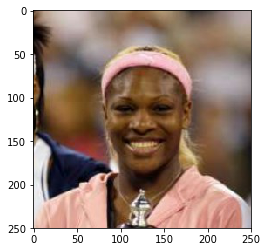

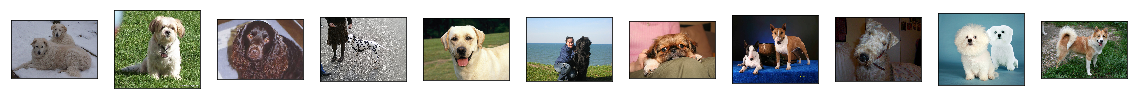

In [6]:
human_files_short = human_files[:100]
#human_files_short = human_files[:]
dog_files_short = train_files[:100]
#dog_files_short = train_files[:]
# Do NOT modify the code above this line.

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_faces_detected_list = [face_detector(x) for x in human_files_short]
human_faces_detected_percent = sum(human_faces_detected_list)/len(human_files_short)*100
dog_faces_detected_list = [face_detector(x) for x in dog_files_short]
dog_faces_detected_total = sum(dog_faces_detected_list)
dogs_faces_detected_percent = dog_faces_detected_total/len(dog_files_short)*100

print(human_faces_detected_percent, "% of human faces detected correctly")
print(dogs_faces_detected_percent, "% of dogs faces detected as human")

for i in range(0, len(human_faces_detected_list)):
    if not human_faces_detected_list[i]:
        print("\n",human_files_short[i])
        img = cv2.imread(human_files_short[i])
        cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(cv_rgb)
        plt.show()
        
def visualize_img(img_path, ax):
    img = cv2.imread(img_path)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
fig = plt.figure(figsize=(20, 10))
index = 0
for i in range(0, len(dog_faces_detected_list)):
    if dog_faces_detected_list[i]:
        ax = fig.add_subplot(1, dog_faces_detected_total, index + 1, xticks=[], yticks=[])
        visualize_img(train_files[i], ax)
        index += 1

In [7]:
#Check the percentages for the full sets
human_faces_detected_percent = sum([face_detector(x) for x in human_files])/len(human_files)*100
dogs_faces_detected_percent = sum([face_detector(x) for x in train_files])/len(train_files)*100

print("The percent of faces correctly detected in the full human images set: {0:.2f}%".format(human_faces_detected_percent))
print("The percent of dogs incorrectly detected as human faces: {0:.2f}%".format(dogs_faces_detected_percent))

The percent of faces correctly detected in the full human images set: 98.75%
The percent of dogs incorrectly detected as human faces: 10.90%


__Question 2:__ This algorithmic choice necessitates that we communicate to the user that we accept human images only when they provide a clear view of a face (otherwise, we risk having unneccessarily frustrated users!). In your opinion, is this a reasonable expectation to pose on the user? If not, can you think of a way to detect humans in images that does not necessitate an image with a clearly presented face?

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on each of the datasets.

__Answer:__ It does not seem unreasonable to expect a clear view of a face for an application that will need to detect the face and perform some function upon the image of the face area. In this case, 98.75% of faces were correctly detected. Using the 'face_recognition' module as shown below, the percentage of correctly detected faces increases to 99.99%. Since these success percentages are so high, it would be seldom that a user would need to resubmit with a clear image.

Otherwise, a human could be detected using a CNN which detects a human body in general, which wouldn't necessarily need a clear view of a face.

In the code below, another face detection algorithm was used. This is the 'face_recognition' module (https://pypi.python.org/pypi/face_recognition). This was used with the 'cnn' model setting and had a better detection rate. Note that this module had some issues with large images (resolved by reducing some "too big" images temporarily) and some other random run issues on the dog training set, so the number of images tested was reduced to the first 1800 training images.

The percentage of faces correctly detected on the full set of 13233 human images was 99.99%. The percentage of "incorrectly" detected human faces in the first 1800 dog images was 3.17%. Note however that, as shown below, many of these images did contain a human face with the dog in the image.


In [8]:
def face_recognition_detector(img_path):
    img = face_recognition.load_image_file(img_path)
    #img = cv2.imread(train_files[i])
    face_location = face_recognition.face_locations(img, number_of_times_to_upsample=0, model='cnn')
    return len(face_location) > 0

In [9]:
## (Optional) TODO: Report the performance of another  
## face detection algorithm on the LFW dataset
### Feel free to use as many code cells as needed.
import face_recognition

#Check the percentages for the full sets
face_recog_list = []
for i in range(0, len(human_files)):
    #print(i)
    face_recog_list.append(face_recognition_detector(human_files[i]))
    
human_faces_detected_face_recognition_percent = sum(face_recog_list)/len(face_recog_list)*100

print("The percent of faces correctly detected in the full human images set: {0:.2f}%".format(human_faces_detected_face_recognition_percent))



The percent of faces correctly detected in the full human images set: 99.99%


In [10]:
from PIL import Image

dog_face_recog_list = []
for i in range(0, 1800):
    img = face_recognition.load_image_file(train_files[i])
    if img.shape[0]*img.shape[1] > 5000000: # for files that are too big, resize and save to tmp file, then do face_recognition
        foo = Image.open(train_files[i])
        foo = foo.resize((int(img.shape[0]/2), int(img.shape[1]/2)), Image.ANTIALIAS)
        foo.save("/tmp/image_scaled.jpg",quality=95)
        dog_face_recog_list.append(face_recognition_detector("/tmp/image_scaled.jpg"))
    else:
        dog_face_recog_list.append(face_recognition_detector(train_files[i]))
    
dog_facds_detected_face_recognition_percent = sum(dog_face_recog_list)/len(dog_face_recog_list)*100

print("The percent of dogs incorrectly detected as human face, from the full training set: {0:.2f}%".format(dog_facds_detected_face_recognition_percent))

The percent of dogs incorrectly detected as human face, from the full training set: 3.17%


These 57 dog images have been detected as having a human face:


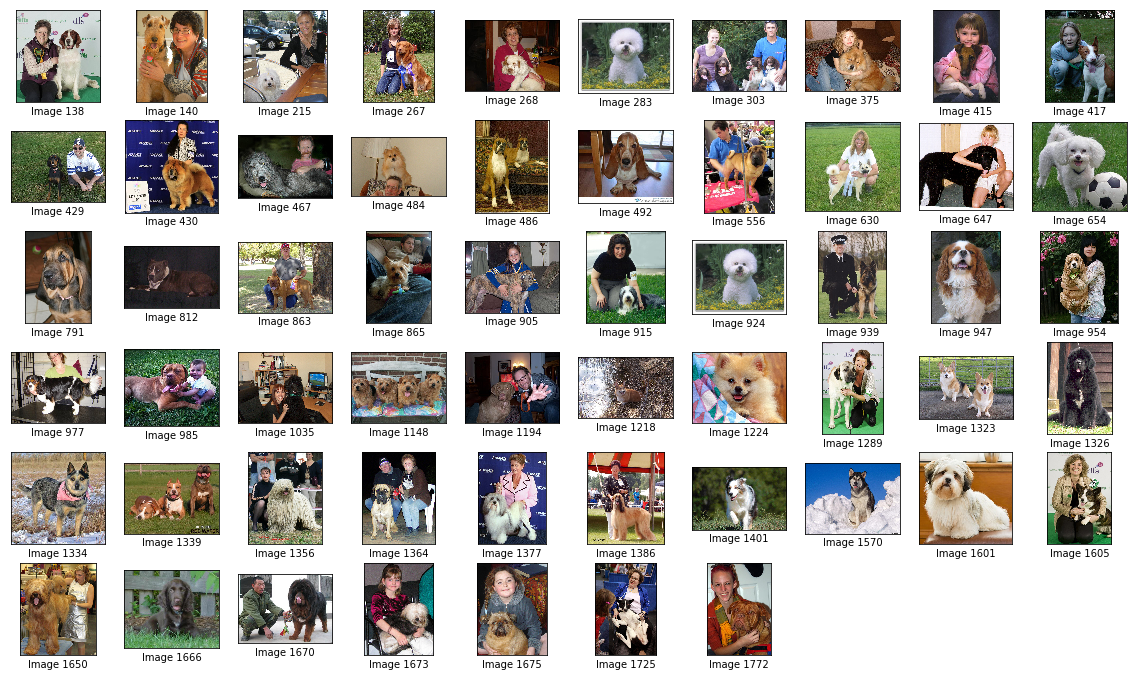

In [11]:
image_detected_as_face_list = [i for i,j in enumerate(dog_face_recog_list) if j]
print("These", sum(dog_face_recog_list), "dog images have been detected as having a human face:")

fig = plt.figure(figsize=(20, 20))
index = 0
for i in image_detected_as_face_list:
    ax = fig.add_subplot(10, 10, index + 1, xticks=[], yticks=[])
    ax.set_xlabel("Image {:d}".format(i))
    visualize_img(train_files[i], ax)
    index += 1

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a pre-trained [ResNet-50](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006) model to detect dogs in images.  Our first line of code downloads the ResNet-50 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Given an image, this pre-trained ResNet-50 model returns a prediction (derived from the available categories in ImageNet) for the object that is contained in the image.

In [12]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [13]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

### Making Predictions with ResNet-50

Getting the 4D tensor ready for ResNet-50, and for any other pre-trained model in Keras, requires some additional processing.  First, the RGB image is converted to BGR by reordering the channels.  All pre-trained models have the additional normalization step that the mean pixel (expressed in RGB as $[103.939, 116.779, 123.68]$ and calculated from all pixels in all images in ImageNet) must be subtracted from every pixel in each image.  This is implemented in the imported function `preprocess_input`.  If you're curious, you can check the code for `preprocess_input` [here](https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py).

Now that we have a way to format our image for supplying to ResNet-50, we are now ready to use the model to extract the predictions.  This is accomplished with the `predict` method, which returns an array whose $i$-th entry is the model's predicted probability that the image belongs to the $i$-th ImageNet category.  This is implemented in the `ResNet50_predict_labels` function below.

By taking the argmax of the predicted probability vector, we obtain an integer corresponding to the model's predicted object class, which we can identify with an object category through the use of this [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). 

In [14]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

### Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained ResNet-50 model, we need only check if the `ResNet50_predict_labels` function above returns a value between 151 and 268 (inclusive).

We use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [15]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 3:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ The 'dog_detector()' function using ResNet50 detects 1% of human faces in the short set as a dog, and 100% of the short set of dog images detected as a dog.

In [16]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
ResNet50_human_faces_detected_as_dog_list = [dog_detector(x) for x in human_files_short]
ResNet50_dog_faces_detected_as_dog_list = [dog_detector(x) for x in dog_files_short]

ResNet50_human_faces_detected_as_dog_pct = sum(ResNet50_human_faces_detected_as_dog_list)/len(ResNet50_human_faces_detected_as_dog_list)*100
ResNet50_dog_faces_detected_as_dog_pct = sum(ResNet50_dog_faces_detected_as_dog_list)/len(ResNet50_dog_faces_detected_as_dog_list)*100

print("The percent of human faces detected as a dog: {0:.2f}%".format(ResNet50_human_faces_detected_as_dog_pct))
print("The percent of dog faces detected as a dog: {0:.2f}%".format(ResNet50_dog_faces_detected_as_dog_pct))

The percent of human faces detected as a dog: 1.00%
The percent of dog faces detected as a dog: 100.00%


Human images detected as having a dog:
lfw/Tony_Bennett/Tony_Bennett_0003.jpg


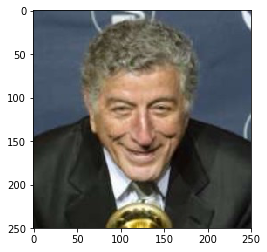

In [17]:
print("Human images detected as having a dog:")
for index in [i for i, j in enumerate(ResNet50_human_faces_detected_as_dog_list) if j]:
    print(human_files_short[index])
    img = cv2.imread(human_files_short[index])
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()



---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 1%.  In Step 5 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

Be careful with adding too many trainable layers!  More parameters means longer training, which means you are more likely to need a GPU to accelerate the training process.  Thankfully, Keras provides a handy estimate of the time that each epoch is likely to take; you can extrapolate this estimate to figure out how long it will take for your algorithm to train. 

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have great difficulty in distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun! 

### Pre-process the Data

We rescale the images by dividing every pixel in every image by 255.

In [18]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 836/836 [00:04<00:00, 209.91it/s]


In [43]:
print(train_tensors.shape)
print(valid_tensors.shape)
print(test_tensors.shape)

(6680, 224, 224, 3)
(835, 224, 224, 3)
(836, 224, 224, 3)


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        model.summary()

We have imported some Python modules to get you started, but feel free to import as many modules as you need.  If you end up getting stuck, here's a hint that specifies a model that trains relatively fast on CPU and attains >1% test accuracy in 5 epochs:

![Sample CNN](images/sample_cnn.png)
           
__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  If you chose to use the hinted architecture above, describe why you think that CNN architecture should work well for the image classification task.

__Answer:__ Initially, for comparison, I tried the hinted CNN architecture, which gave a test accuracy of about 1.5%. Then, I tried my own CNN with 2 convolutional layers with 16 filters and 2 fully connected layers. This performed better, but not exceedingly so. I then tried varitions and ended up with the current model which ended up around 7% accuracy. To try to get a better success rate, I added augmentation to my input, which brought up the final accuracy to 12.92%

In [19]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=8, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(133, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 8)       104       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 8)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 16)      528       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 32)        2080      
__________

### Compile the Model

In [20]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [21]:
from keras.callbacks import ModelCheckpoint  
from keras.preprocessing.image import ImageDataGenerator


### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 40
batch_size= 20

datagen = ImageDataGenerator(rotation_range=45, width_shift_range=.2, height_shift_range=.2, horizontal_flip=True)
generator = datagen.flow(train_tensors, train_targets, batch_size=batch_size)

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit_generator(generator=generator, steps_per_epoch=len(train_tensors)//batch_size, epochs=epochs, verbose=1, validation_data=(valid_tensors, valid_targets), callbacks=[checkpointer])

Epoch 1/40
334/334 [==============================] - 95s - loss: 4.8455 - acc: 0.0109 - val_loss: 4.7081 - val_acc: 0.0228
Epoch 2/40
334/334 [==============================] - 95s - loss: 4.6076 - acc: 0.0314 - val_loss: 4.4790 - val_acc: 0.0443
Epoch 3/40
334/334 [==============================] - 101s - loss: 4.4606 - acc: 0.0377 - val_loss: 4.3828 - val_acc: 0.0455
Epoch 4/40
334/334 [==============================] - 102s - loss: 4.3966 - acc: 0.0428 - val_loss: 4.3216 - val_acc: 0.0539
Epoch 5/40
334/334 [==============================] - 105s - loss: 4.3184 - acc: 0.0479 - val_loss: 4.2840 - val_acc: 0.0659
Epoch 6/40
334/334 [==============================] - 102s - loss: 4.2756 - acc: 0.0552 - val_loss: 4.2195 - val_acc: 0.0623
Epoch 7/40
334/334 [==============================] - 103s - loss: 4.2121 - acc: 0.0611 - val_loss: 4.1156 - val_acc: 0.0719
Epoch 8/40
334/334 [==============================] - 103s - loss: 4.1368 - acc: 0.0648 - val_loss: 4.1014 - val_acc: 0.0826
Ep

### Load the Model with the Best Validation Loss

In [22]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [23]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 12.9187%


---
<a id='step4'></a>
## Step 4: Use a CNN to Classify Dog Breeds

To reduce training time without sacrificing accuracy, we show you how to train a CNN using transfer learning.  In the following step, you will get a chance to use transfer learning to train your own CNN.

### Obtain Bottleneck Features

In [24]:
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

### Model Architecture

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [25]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 133)               68229     
Total params: 68,229.0
Trainable params: 68,229.0
Non-trainable params: 0.0
_________________________________________________________________


### Compile the Model

In [26]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [27]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 1s - loss: 12.2419 - acc: 0.1254 - val_loss: 10.6634 - val_acc: 0.2228
Epoch 2/20
6680/6680 [==============================] - 1s - loss: 10.0660 - acc: 0.2883 - val_loss: 10.1016 - val_acc: 0.2838
Epoch 3/20
6680/6680 [==============================] - 1s - loss: 9.6563 - acc: 0.3473 - val_loss: 9.9442 - val_acc: 0.3138
Epoch 4/20
6680/6680 [==============================] - 1s - loss: 9.4644 - acc: 0.3762 - val_loss: 9.7902 - val_acc: 0.3246
Epoch 5/20
6680/6680 [==============================] - 1s - loss: 9.2633 - acc: 0.3954 - val_loss: 9.6260 - val_acc: 0.3377
Epoch 6/20
6680/6680 [==============================] - 1s - loss: 9.1716 - acc: 0.4076 - val_loss: 9.5445 - val_acc: 0.3545
Epoch 7/20
6680/6680 [==============================] - 1s - loss: 9.0835 - acc: 0.4177 - val_loss: 9.5085 - val_acc: 0.3509
Epoch 8/20
6680/6680 [==============================] - 1s - loss: 8.9411 

### Load the Model with the Best Validation Loss

In [28]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

### Test the Model

Now, we can use the CNN to test how well it identifies breed within our test dataset of dog images.  We print the test accuracy below.

In [29]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 42.2249%


### Predict Dog Breed with the Model

In [30]:
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

---
<a id='step5'></a>
## Step 5: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

In Step 4, we used transfer learning to create a CNN using VGG-16 bottleneck features.  In this section, you must use the bottleneck features from a different pre-trained model.  To make things easier for you, we have pre-computed the features for all of the networks that are currently available in Keras:
- [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) bottleneck features
- [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) bottleneck features
- [Inception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) bottleneck features
- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) bottleneck features

The files are encoded as such:

    Dog{network}Data.npz
    
where `{network}`, in the above filename, can be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.  Pick one of the above architectures, download the corresponding bottleneck features, and store the downloaded file in the `bottleneck_features/` folder in the repository.

### (IMPLEMENTATION) Obtain Bottleneck Features

In the code block below, extract the bottleneck features corresponding to the train, test, and validation sets by running the following:

    bottleneck_features = np.load('bottleneck_features/Dog{network}Data.npz')
    train_{network} = bottleneck_features['train']
    valid_{network} = bottleneck_features['valid']
    test_{network} = bottleneck_features['test']

In [31]:
### TODO: Obtain bottleneck features from another pre-trained CNN.
bottleneck_features = np.load('bottleneck_features/DogVGG19Data.npz')
train_VGG19 = bottleneck_features['train']
valid_VGG19 = bottleneck_features['valid']
test_VGG19 = bottleneck_features['test']

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        <your model's name>.summary()
   
__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ Initially for comparison, I tried each of the models: VGG19, Resnet50, InceptionV3, or Xception using the same default setup as in the VGG16 model above. The initial accuracy was highest for VGG19, so I chose to go with this model.

From there, I played with the fully connected layer, trying multiple hidden layers, dense combos, and dropouts. For my attempts, the single input and output layer below with dropout of .2 worked best. I also changed the optimizer to 'sgd' which seemed have the most effect on accuracy. I tried different learning rates for 'sgd', but the default had the best results.



In [32]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

### TODO: Define your architecture.
VGG19_model = Sequential()
VGG19_model.add(GlobalAveragePooling2D(input_shape=train_VGG19.shape[1:]))
VGG19_model.add(Dense(200, activation='relu'))
VGG19_model.add(Dropout(.2))
VGG19_model.add(Dense(133, activation='softmax'))

VGG19_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               102600    
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 133)               26733     
Total params: 129,333.0
Trainable params: 129,333.0
Non-trainable params: 0.0
_________________________________________________________________


### (IMPLEMENTATION) Compile the Model

In [33]:
### TODO: Compile the model.
VGG19_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.  

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [34]:
from keras.callbacks import ModelCheckpoint 

### TODO: Train the model.
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG19.hdf5', 
                               verbose=1, save_best_only=True)

VGG19_model.fit(train_VGG19, train_targets, 
          validation_data=(valid_VGG19, valid_targets),
          epochs=50, batch_size=100, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/50
6680/6680 [==============================] - 1s - loss: 6.3067 - acc: 0.0894 - val_loss: 3.6362 - val_acc: 0.2371
Epoch 2/50
6680/6680 [==============================] - 0s - loss: 3.3864 - acc: 0.2558 - val_loss: 2.6861 - val_acc: 0.3988
Epoch 3/50
6680/6680 [==============================] - 0s - loss: 2.5628 - acc: 0.3957 - val_loss: 2.0579 - val_acc: 0.5078
Epoch 4/50
6680/6680 [==============================] - 0s - loss: 2.0367 - acc: 0.4892 - val_loss: 1.6973 - val_acc: 0.5509
Epoch 5/50
6680/6680 [==============================] - 0s - loss: 1.6957 - acc: 0.5546 - val_loss: 1.4824 - val_acc: 0.5928
Epoch 6/50
6680/6680 [==============================] - 0s - loss: 1.4593 - acc: 0.6045 - val_loss: 1.3366 - val_acc: 0.6263
Epoch 7/50
6680/6680 [==============================] - 0s - loss: 1.2928 - acc: 0.6431 - val_loss: 1.2169 - val_acc: 0.6503
Epoch 8/50
6680/6680 [==============================] - 0s - loss: 1.1502 - ac

### (IMPLEMENTATION) Load the Model with the Best Validation Loss

In [35]:
### TODO: Load the model weights with the best validation loss.
VGG19_model.load_weights('saved_models/weights.best.VGG19.hdf5')

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 60%.

In [36]:
### TODO: Calculate classification accuracy on the test dataset.
# get index of predicted dog breed for each image in test set
VGG19_predictions = [np.argmax(VGG19_model.predict(np.expand_dims(featuCre, axis=0))) for feature in test_VGG19]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG19_predictions)==np.argmax(test_targets, axis=1))/len(VGG19_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 78.5885%


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by your model.  

Similar to the analogous function in Step 5, your function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to your chosen CNN architecture, you need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

In [37]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
def VGG19_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG19(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG19_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

def VGG19_predict_breeds(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG19(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG19_model.predict(bottleneck_feature)
    #check the two highest predictions in the vector, and return both if determined to be a mix
    two_highest = sorted(predicted_vector[0], reverse=True)[:2]
    if two_highest[1] > 0.2:
        #print("The two highest: ", two_highest)
        #print(img_path)
        prominent = dog_names[np.argmax(predicted_vector)]
        predicted_vector[0][np.argmax(predicted_vector)] = 0
        secondary = dog_names[np.argmax(predicted_vector)]
        return (prominent, secondary)
    else:
        # return dog breed that is predicted by the model
        return (dog_names[np.argmax(predicted_vector)], None)

---
<a id='step6'></a>
## Step 6: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 5 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [45]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import face_recognition

def cv2_image_display(img_path):
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()
    
def dog_likeness_print(breed):
    if breed[1]:
        print(breed[0], "mixed with ", breed[1], '\n')
    else:
        print(breed[0], '\n')
    
def dog_likeness_detector(img_path):
    human_face_present = face_recognition_detector(img_path)
    dog_face_present = dog_detector(img_path)
    if dog_face_present or human_face_present:
        breed_s = VGG19_predict_breeds(img_path)
    
    if human_face_present and not dog_face_present: # only Human face detected
        print("Hello, human!")
        cv2_image_display(img_path)
        print("You look like a ...")
        dog_likeness_print(breed_s)

    elif dog_face_present and not human_face_present:
        print("Hello, dog!")
        cv2_image_display(img_path)
        print("I think you are a ...")
        dog_likeness_print(breed_s)
        
    elif human_face_present and dog_face_present:
        print("Hello, human! And hello, dog!")
        cv2_image_display(img_path)
        print("I think your dog is a ...")
        dog_likeness_print(breed_s)
        
    else:
        print("Error: No human or dog faces found", '\n')
        cv2_image_display(img_path)
    


---
<a id='step7'></a>
## Step 7: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ The final accuracy for this VGG19 algorithm was only 78.59%. However, in actual usage with the 'dog_likeness_detector()', I was surprised to see how well it worked. My wife works at a vertinary office, and I used the model on random dog images as a game (printing out each image, the VGG19 prediction, and the name of the actual training file as final answer). The VGG19 model beat my 'dog breed expert' about 30% of the time and lost about 10% of the time. The remaining results were ties.

3 possible ways to improve the algorithm would be 1) continued modification of the fully connected model. I ran these models on my CPU, so time was and would continue to be an issue. 2) I could perform sugmentation of the input data. I would need to augment the data before running it through the VGG19 convolutional layers myself, to create my own bottleneck features. Again, I would be constrained by time on my CPU. 3) I could continue a more thorough investigation of epochs and batch sizes. One more time, this would be more easily performed with something other than the CPU of my laptop.

The moral of this story being, I would need to get setup on a more powerful system, either a local GPU, or a service like AWS. I briefly tried the AWS service using P2.xlarge, but this seemed to result in slower fit times, so I switched back to my local CPU.

In [40]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
human_test_files = np.array(glob("lfw/*/*"))
random.shuffle(human_test_files)
dog_test_files = np.array(glob("dogImages/*/*/*"))
random.shuffle(dog_test_files)

Error: No human or dog faces found 



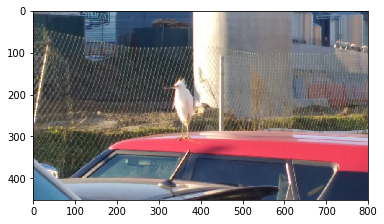

In [46]:
dog_likeness_detector('/home/marka/Downloads/bird.jpg')

Hello, dog!


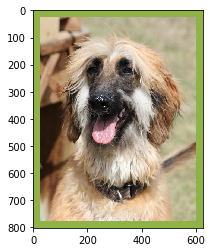

I think you are a ...
Afghan_hound 

Hello, dog!


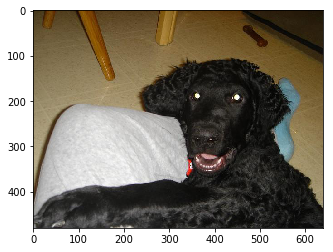

I think you are a ...
Curly-coated_retriever 

Hello, dog!


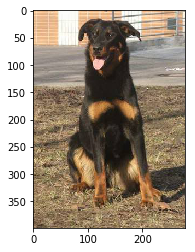

I think you are a ...
Beauceron 



In [109]:
dog_likeness_detector(random.choice(dog_test_files))
dog_likeness_detector(random.choice(dog_test_files))
dog_likeness_detector(random.choice(dog_test_files))

Hello, human!


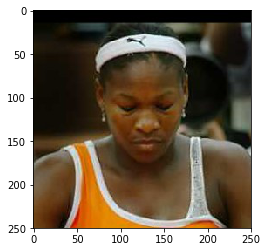

You look like a ...
Basenji 

Hello, human!


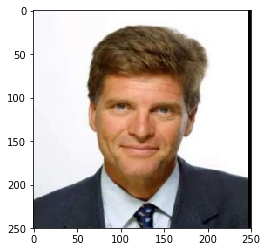

You look like a ...
Ibizan_hound 

Hello, human!


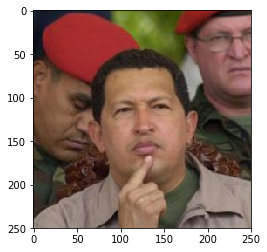

You look like a ...
Pomeranian 



In [110]:
dog_likeness_detector(random.choice(human_test_files))
dog_likeness_detector(random.choice(human_test_files))
dog_likeness_detector(random.choice(human_test_files))

**Test with a few images of "mutts" from Google Images:**

Hello, dog!


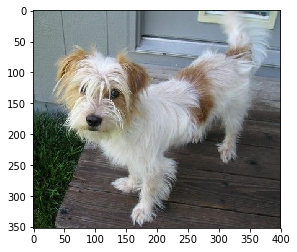

I think you are a ...
Petit_basset_griffon_vendeen mixed with  Glen_of_imaal_terrier 

Hello, dog!


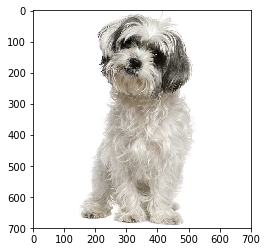

I think you are a ...
Lhasa_apso mixed with  Lowchen 

Hello, dog!


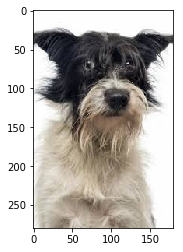

I think you are a ...
Chinese_crested mixed with  Affenpinscher 



In [121]:
img_path = '/home/marka/Downloads/mutt.jpg'
dog_likeness_detector(img_path)
img_path = '/home/marka/Downloads/mutt2.jpg'
dog_likeness_detector(img_path)
img_path = '/home/marka/Downloads/mutt3.jpeg'
dog_likeness_detector(img_path)

The following cell was used to display random dog images as a game. The results were hidden from view while the player guesses. The prediction is shown, along with the actual actual filename to determine the winner.

Hello, dog!


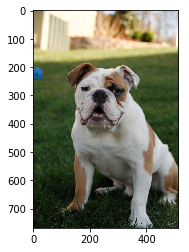

I think you are a ...
Bulldog 

Source file:  dogImages/train/040.Bulldog/Bulldog_02865.jpg


In [42]:
rand_choice = random.choice(dog_test_files)
dog_likeness_detector(rand_choice)
print("Source file: ", rand_choice)